# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

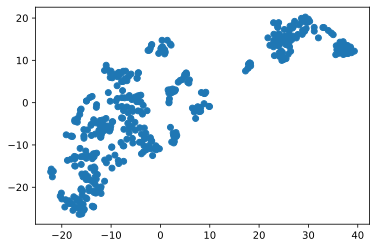

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [12]:
from sklearn.cluster import KMeans

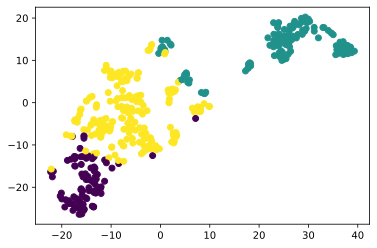

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [14]:
price_0 = np.array(y_train[labels_train == 0].mean())
price_1 = np.array(y_train[labels_train == 1].mean())
price_2 = np.array(y_train[labels_train == 2].mean())
print(f'Среднее значение price в 0 кластере: {price_0[0].round(2)}\nСреднее значение price в 1 кластере: {price_1[0].round(2)}\n\
Среднее значение price в 2 кластере: {price_2[0].round(2)}')

Среднее значение price в 0 кластере: 27.79
Среднее значение price в 1 кластере: 16.17
Среднее значение price в 2 кластере: 24.96


In [37]:
crim_0 = X_train.loc[labels_train == 0, 'CRIM']
crim_1 = X_train.loc[labels_train == 1, 'CRIM']
crim_2 = X_train.loc[labels_train == 2, 'CRIM']
print(f'Среднее значение CRIM в 0 кластере: {crim_0.mean().round(2)}\nСреднее значение CRIM в 1 кластере: {crim_1.mean().round(2)}\n\
Среднее значение CRIM в 2 кластере: {crim_2.mean().round(2)}')

Среднее значение CRIM в 0 кластере: 0.07
Среднее значение CRIM в 1 кластере: 10.8
Среднее значение CRIM в 2 кластере: 0.42


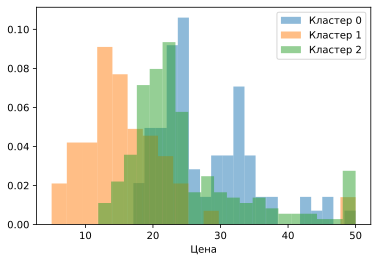

In [16]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

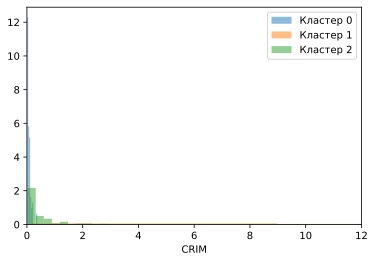

In [41]:
plt.hist(crim_0, bins=10, density=True, alpha=0.5)
plt.hist(crim_1, bins=10, density=True, alpha=0.5)
plt.hist(crim_2, bins=10, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

## *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

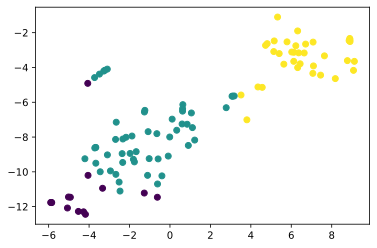

In [42]:
labels_train = kmeans.fit_predict(X_test_scaled)

X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

In [45]:
test_crim_0 = X_test.loc[labels_train == 0, 'CRIM']
test_crim_1 = X_test.loc[labels_train == 1, 'CRIM']
test_crim_2 = X_test.loc[labels_train == 2, 'CRIM']
print(f'Среднее значение CRIM в 0 кластере: {test_crim_0.mean().round(2)}\nСреднее значение CRIM в 1 кластере: {test_crim_1.mean().round(2)}\n\
Среднее значение CRIM в 2 кластере: {test_crim_2.mean().round(2)}')

Среднее значение CRIM в 0 кластере: 0.09
Среднее значение CRIM в 1 кластере: 0.25
Среднее значение CRIM в 2 кластере: 10.17


In [46]:
test_price_0 = np.array(y_test[labels_train == 0].mean())
test_price_1 = np.array(y_test[labels_train == 1].mean())
test_price_2 = np.array(y_test[labels_train == 2].mean())
print(f'Среднее значение price в 0 кластере: {test_price_0[0].round(2)}\nСреднее значение price в 1 кластере: {test_price_1[0].round(2)}\n\
Среднее значение price в 2 кластере: {test_price_2[0].round(2)}')

Среднее значение price в 0 кластере: 33.87
Среднее значение price в 1 кластере: 21.55
Среднее значение price в 2 кластере: 16.44


## Визуально разбиение на кластеры с тестовых данных прошло не плохо, но не идеально. 
## По средним ценам и показателям криминальности все хорошо (логично): 
## Кластер с самым большим показателем CRIM имеет самую низкую среднюю цену (кластер 2), а кластер с самым низким показателем CRIM - самую большую цену (кластер 0).